# Which Employee will Attrition in IBM?
### 어떤 근무 조건을 가진 사람들이 퇴사할까?
- Data : IBM HR Analytics Employee Attrition

## Import Module

In [16]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
import plotly.express as px

## Load Data
**구글 드라이브에서 데이터 로드**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Check Dataset
**Dataset 구성 확인**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HR_Employee_Attrition.csv')
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Output**

총 35개의 변수가 있다.
- 독립변수 : 34개
- 종속변수 : 1개 

총 35개의 자료가 있다.
- 범주형 자료 : 9개
- 수치형 자료 : 26개

**퇴사자 비율 확인**

In [ ]:
print('Percent of Attrition')
print(f'{data.Attrition.value_counts().index[0]} : {round(data.Attrition.value_counts()[0] / len(data), 2) * 100}%')
print(f'{data.Attrition.value_counts().index[1]} : {round(data.Attrition.value_counts()[1] / len(data), 2) * 100}%')

Percent of Attrition
No : 84.0%
Yes : 16.0%


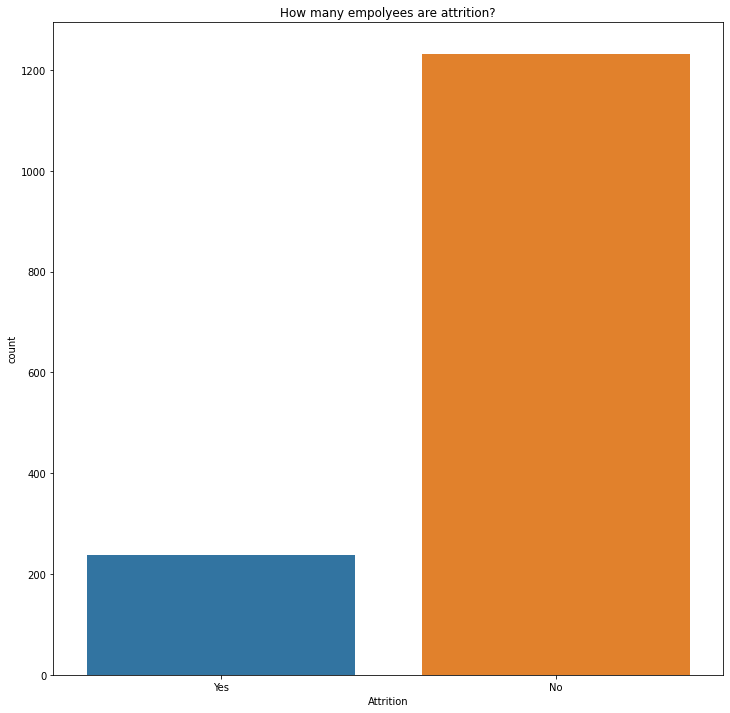

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(x = data['Attrition'])
plt.title('How many empolyees are attrition?')
plt.show()

**Output**

퇴사자 비율이 전체의 16%이다.
- 꽤 많은 수의 퇴사자가 생기므로, 회사 운영에 퇴사자를 예측하는 것이 도움이 될 것이다.

## Data preprocesing


### 결측치 확인

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Output**

결측치(Null data)는 없다.
- 결측치를 임의적으로 코드화하여 표시한 부분은 여기서 확인되지 않음

### 이상치 확인

**범주형 자료 확인**

In [ ]:
cate_cols = []
for column in data.columns:
    if data[column].dtype == object:
        cate_cols.append(column)
        print('##########################################################')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        print()
        
print()
print(f'Number of categorical column : {len(cate_cols)}')

##########################################################
Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

##########################################################
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

##########################################################
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

##########################################################
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

###############################

**Output**

이상치 : `Over18`
- `Over18`이 Y값 하나만 가지고 있다.

**수치형 자료 확인**

In [ ]:
cont_cols = []
for column in data.columns:
    if data[column].dtype != object:
        cont_cols.append(column)
        print(f'{column} : {data[column].nunique()}')
        print('##########################################################')
print()
print(f'Number of numeric column : {len(cont_cols)} 개')

Age : 43
##########################################################
DailyRate : 886
##########################################################
DistanceFromHome : 29
##########################################################
Education : 5
##########################################################
EmployeeCount : 1
##########################################################
EmployeeNumber : 1470
##########################################################
EnvironmentSatisfaction : 4
##########################################################
HourlyRate : 71
##########################################################
JobInvolvement : 4
##########################################################
JobLevel : 5
##########################################################
JobSatisfaction : 4
##########################################################
MonthlyIncome : 1349
##########################################################
MonthlyRate : 1427
#######################################################

**Output**

이상치 : `EmployeeCount, StandardHours, EmployeeNumber`
- `EmployeeCount, StandardHours`는 값을 1개만 가진다.
- `EmployeeNumber`는 모든 값을 가진다.

## Data EDA
데이터 시각화 진행

### Categorical Variable
범주형 자료와 Attrition 간 분포를 파악한다.

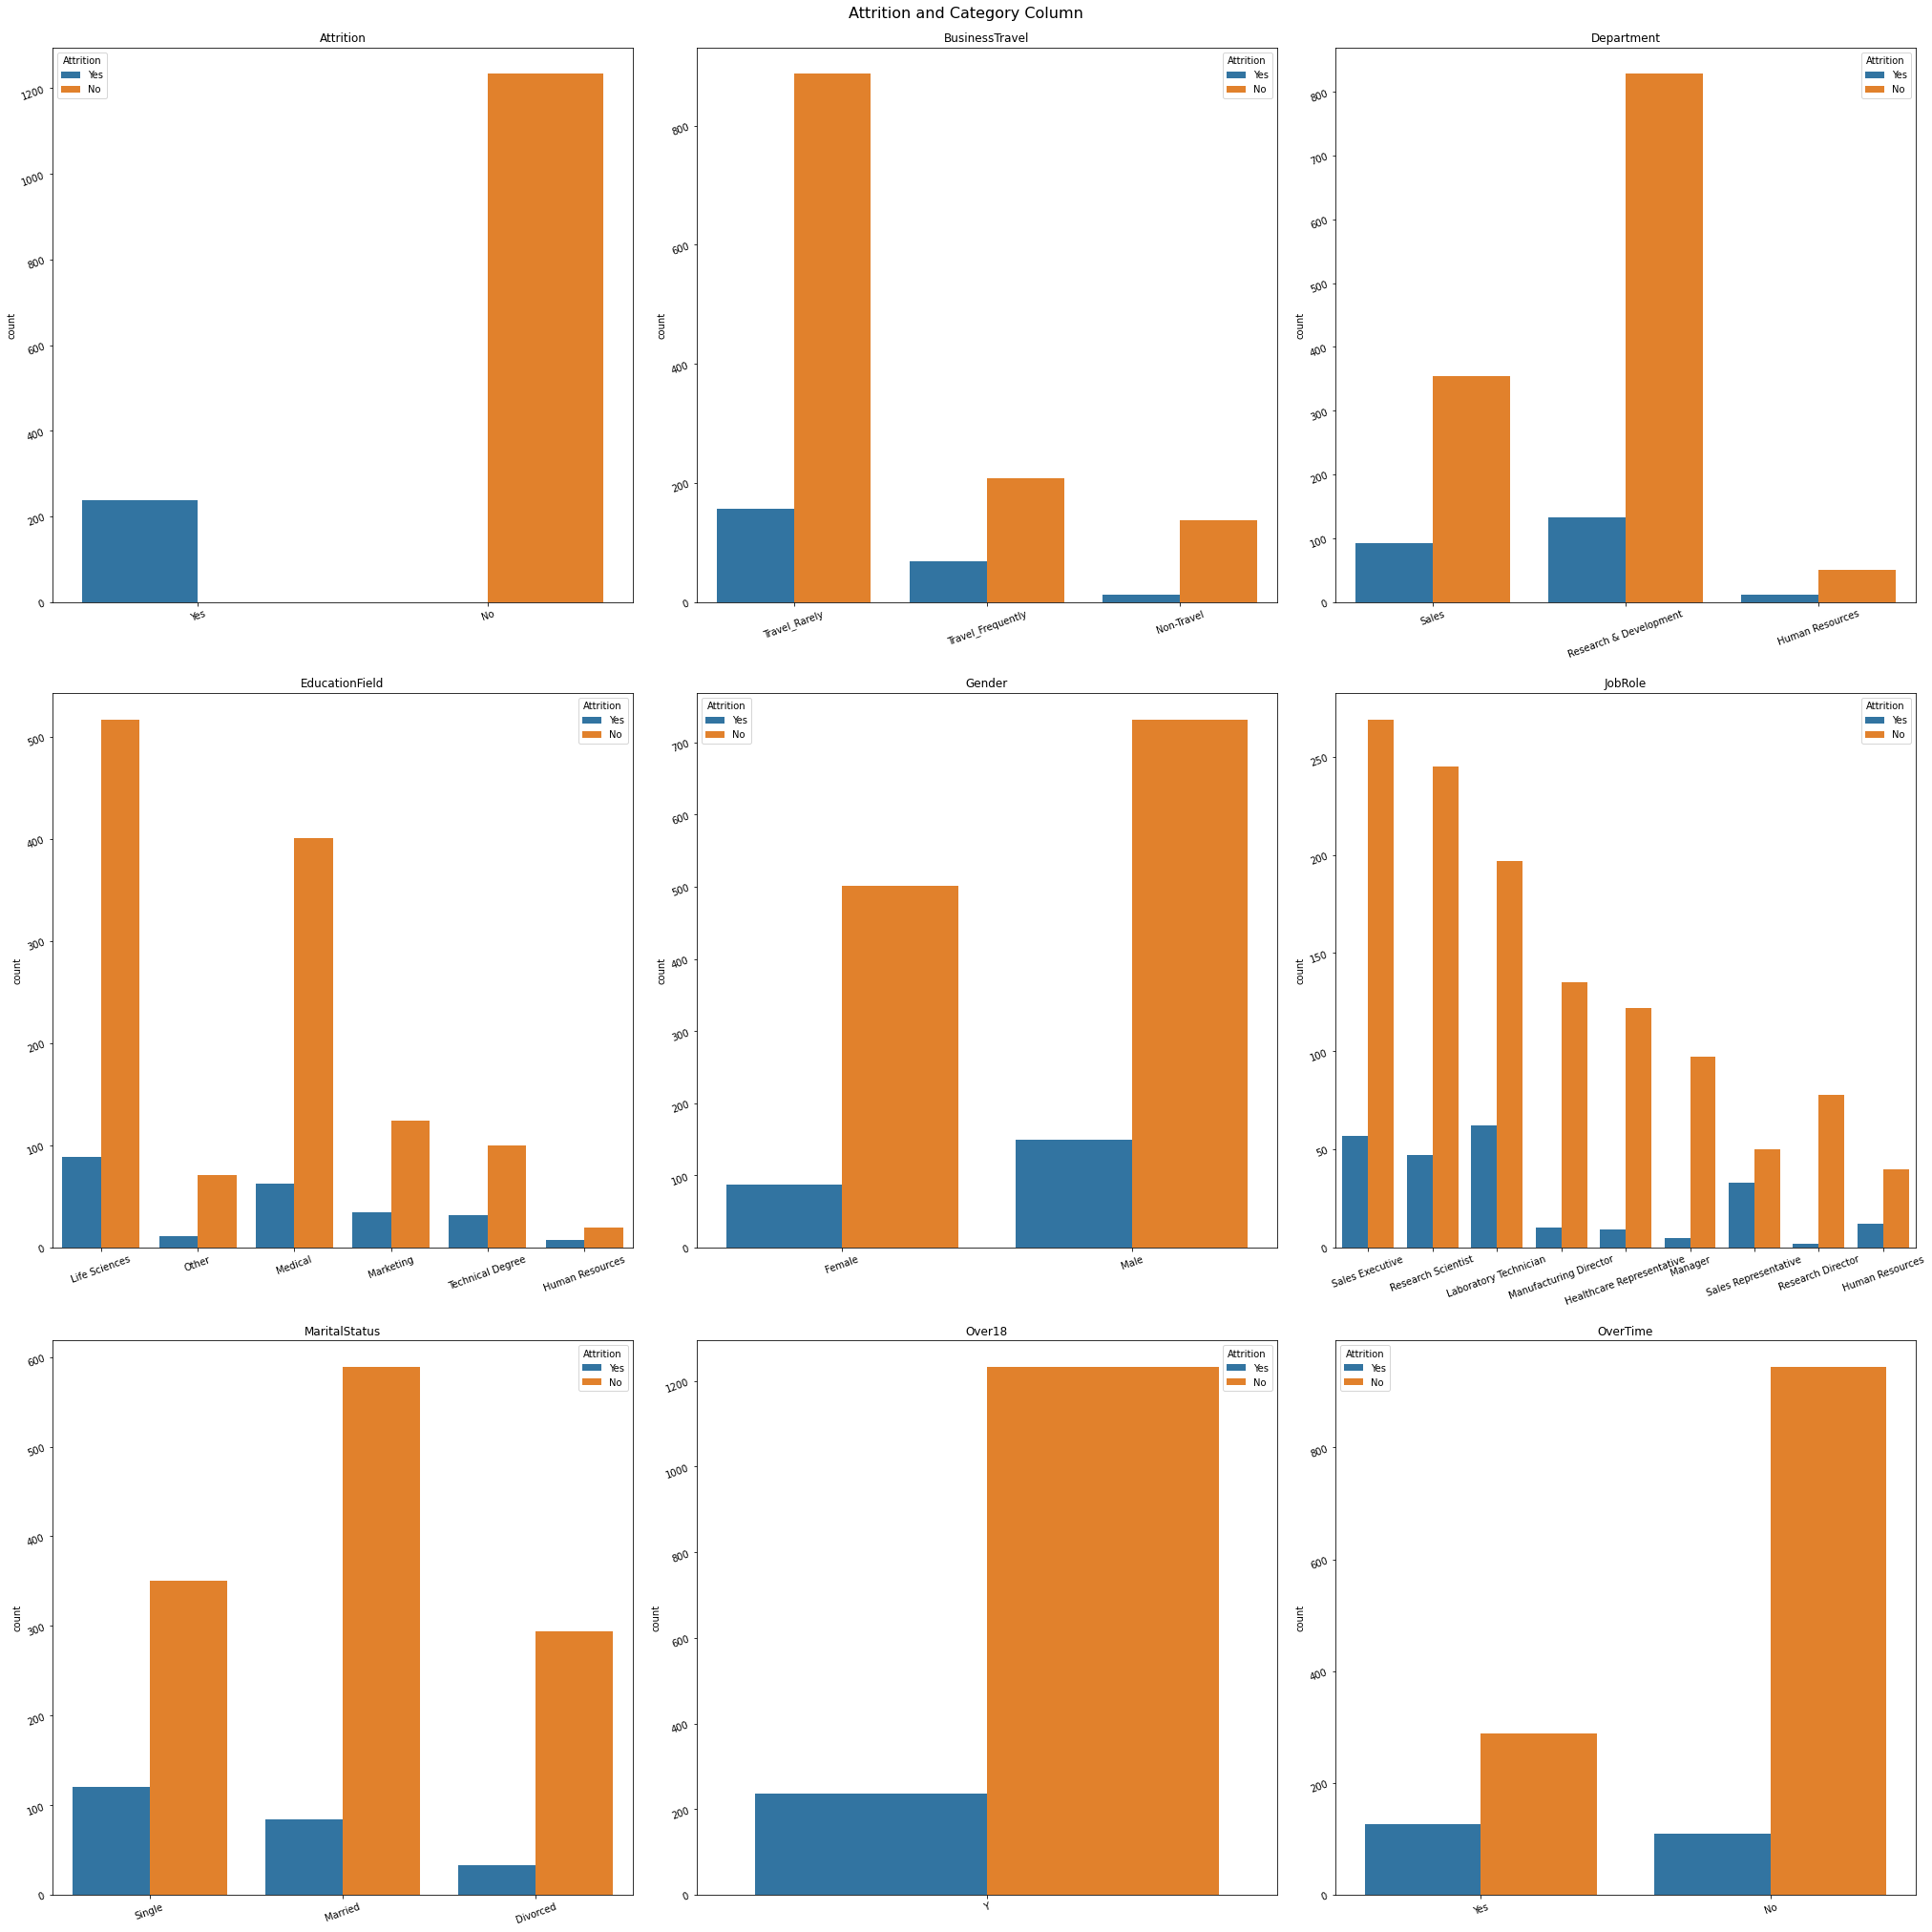

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(28, 28), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition and Category Column', fontsize=16)

for i in range(len(cate_cols)):
    sns.countplot(x=cate_cols[i], data=data,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cate_cols[i])
    
    if data[cate_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)
        
plt.show()

### Numeric Variable
범주형 자료와 Attrition 간 분포를 파악한다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

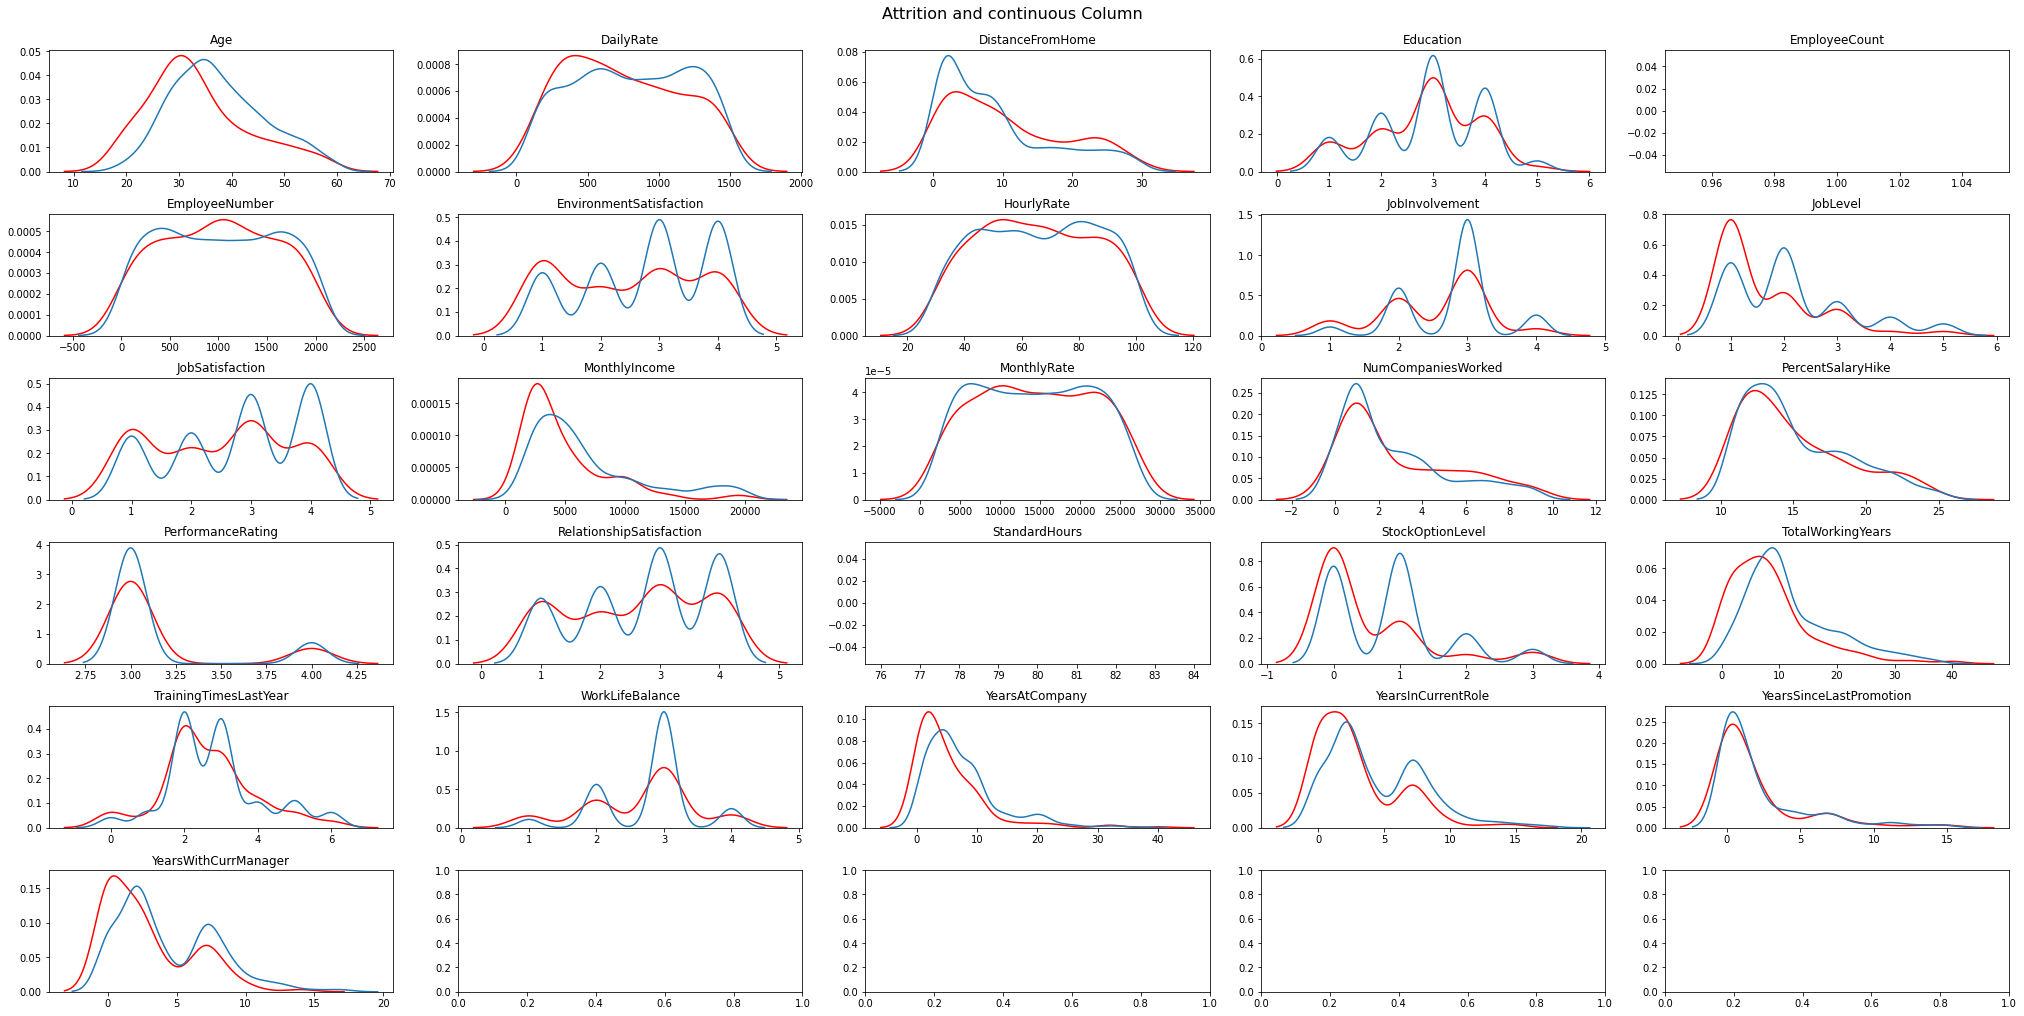

In [ ]:
fig, ax = plt.subplots(6, 5, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition and continuous Column', fontsize=16)

for i in range(len(cont_cols)):
    sns.distplot(data[data['Attrition'] == 'Yes'][cont_cols[i]], color='Red', ax=ax[i], hist = False).set(xlabel = None, ylabel = None)
    sns.distplot(data[data['Attrition'] == 'No'][cont_cols[i]], ax=ax[i],hist = False).set(xlabel = None, ylabel = None)
    ax[i].set(title = cont_cols[i])
    
plt.show()

**Final Output**

퇴사자 비율이 전체 모수와 비슷한 경향을 보이고 있으므로 정확한 퇴사 원인을 밝히기 위해, 각각 상관관계를 따로 파악할 필요가 있다.

### Correlation
밑에서 진행한 수치형 변수들의 상관관계 분석을 통해 도출한 변수와 퇴사자 비율간의 EDA 진행

**MontlyIncome and Attrition**

가설 : 월급여가 낮은 사람이 더 퇴사를 많이 할 것이다.

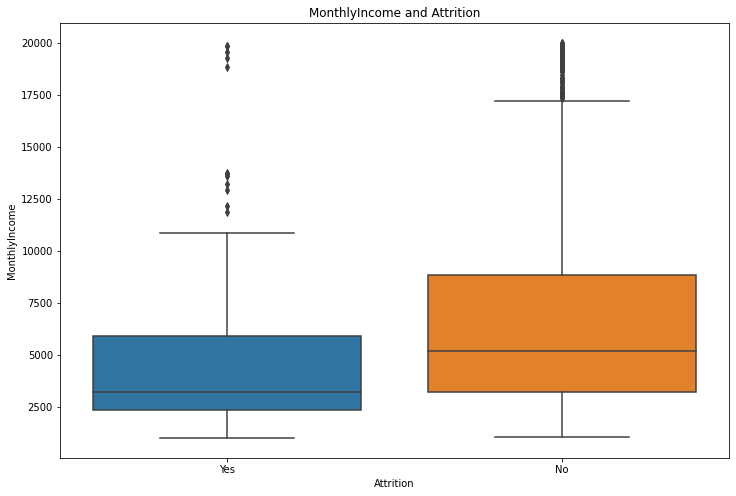

In [ ]:
plt.figure(figsize = (12,8))
plt.title('MonthlyIncome and Attrition')
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = data)
plt.show()

**Output**

월급여가 낮은 사람들이 퇴사가 있으므로, 월급여와 퇴사율 간의 상관관계가 있다.

**JobLevel and Attrition**

가설 : Job level에 낮은 사람이 퇴사를 많이 할 것이다.
- Job level이 낮을수록 월급여가 낮은 사람이기 때문에

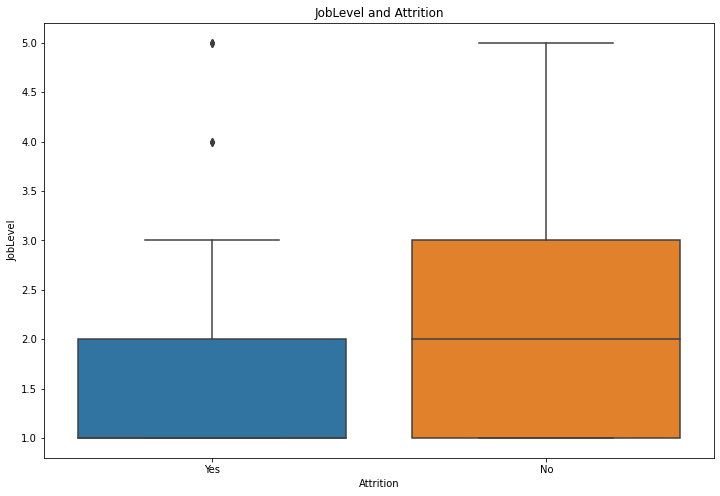

In [17]:
plt.figure(figsize = (12,8))
plt.title('JobLevel and Attrition')
sns.boxplot(x = 'Attrition', y = 'JobLevel', data = data)
plt.show()

**Output**

Job level에 낮은 사람들이 퇴사가 있으나 수가 많아보이지 않으므로, 월급여와 퇴사율 간의 상관관계가 없다고 볼 수 있다.

## Correlation between Numeric Variable
수치형 변수 간 상관관계 파악

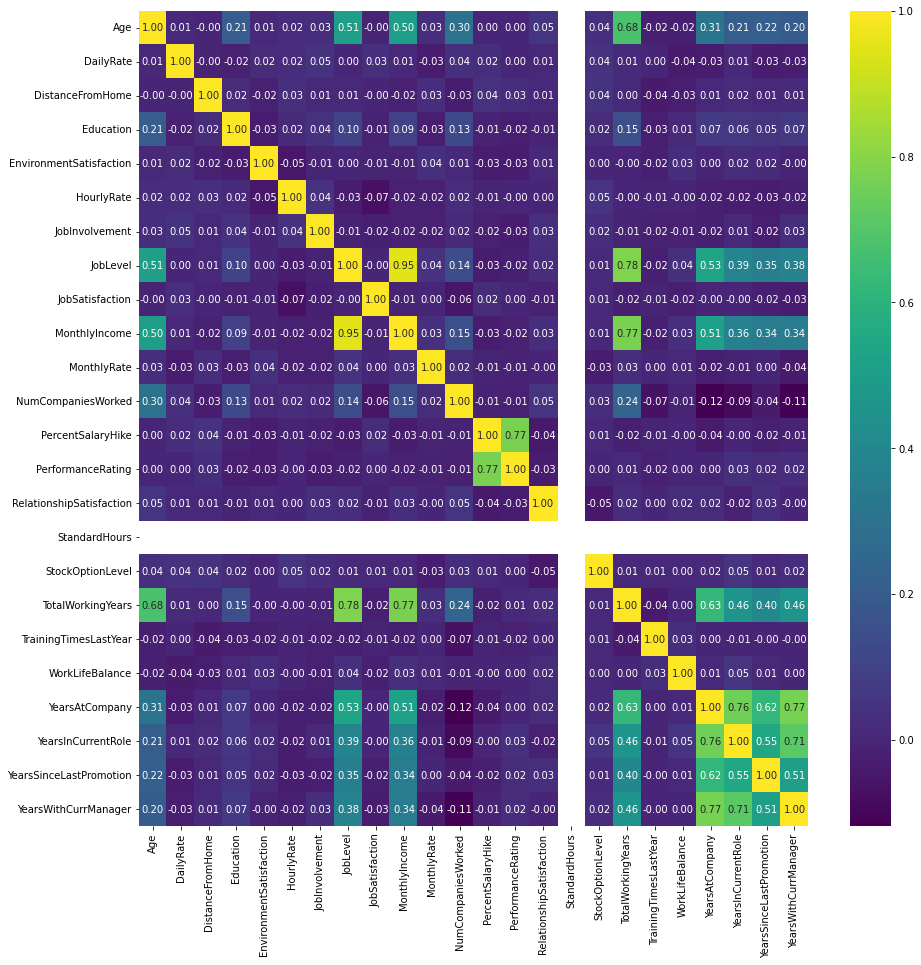

In [ ]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

**Output**

각각 높은 상관관계를 보인 변수들을 따로 정리했다.
- Job level과 Montly income
- Job level과 Total working years
- Total working years과 Montly income

따라서, ***Job level, Montly income, Total working years***는 높은 상관관계를 보인다.

(Years At Company, Years in Current role, Yeas since last promotion, Years with currmanager도 높은 상관관계를 보였으나, 이 부분은 total working year에 영향을 주는 요소라고 생각하여 따로 분석하지 않았다.)

## Create Derived Variable
파생 변수 생성
- 분석의 결과가 좋지 않아, 따로 파생 변수를 설정하지 못했습니다.